<a href="https://colab.research.google.com/github/ahmer-talal/Colab-Files/blob/main/Zepop_ResearchPaperCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ahmer Talal    SP23-BCS-041**

## ZePoP: A Distributed Leader Election Protocol using the Delay-based Closeness Centrality for Peer-to-Peer Applications

In [6]:
pip install matplotlib numpy networkx

--- Running Centralized Leader Election Example ---

✨ FINAL ELECTED LEADER (Centralized Example) = 0 (Closeness: 0.0000)
--------------------------------------------------

--- Generating Figure 8: Random Overlay Network ---


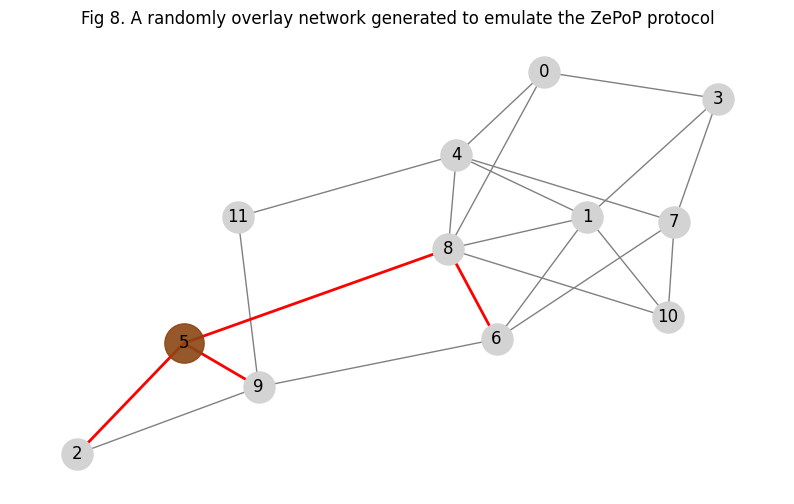


--- Generating Figure 9: Closeness Centrality Comparison ---


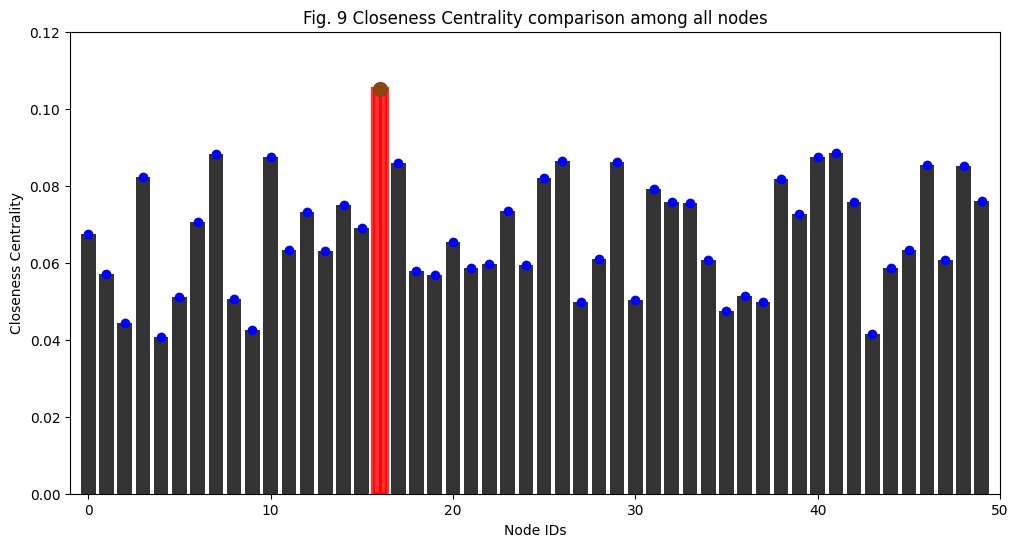


--- Generating Figure 10: Eccentricity Comparison ---


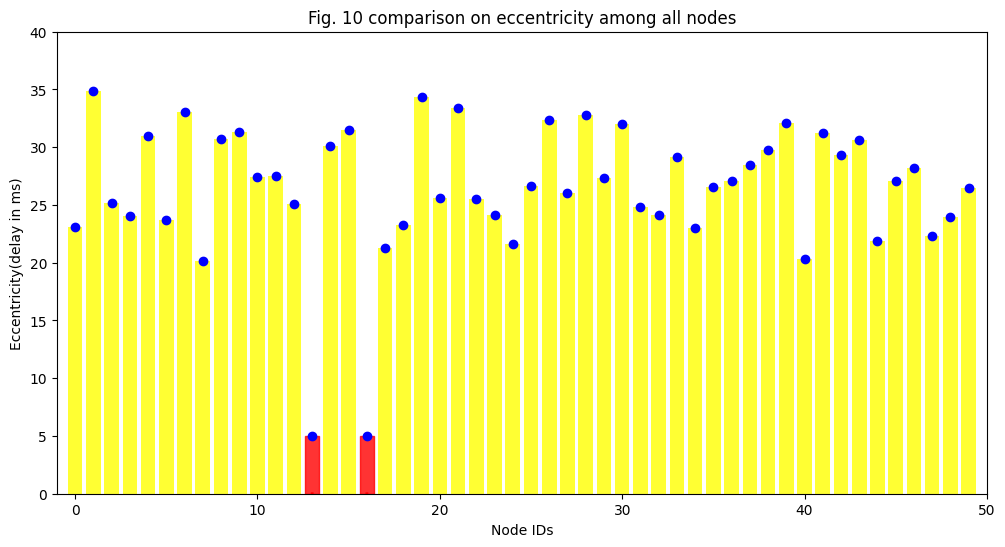


--- Generating Figure 11: Dynamic vs Static Delay Comparison ---


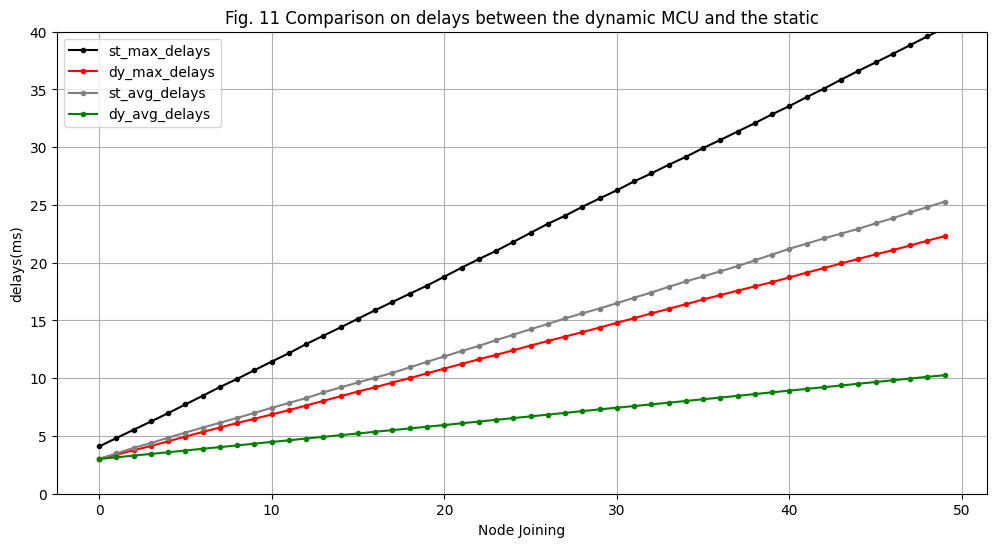


All figures have been generated and displayed locally.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
import math
import heapq

# --- Section 1: Core Utilities (From your original code) ---
class Graph:
    def __init__(self, n):
        self.n = n
        self.adj = {i: {} for i in range(n)}

    def add_edge(self, u, v, delay):
        self.adj[u][v] = delay
        self.adj[v][u] = delay

    def dijkstra(self, src):
        dist = [math.inf] * self.n
        dist[src] = 0
        pq = [(0, src)]

        while pq:
            d, u = heapq.heappop(pq)
            if d != dist[u]:
                continue
            for v, w in self.adj[u].items():
                nd = d + w
                if nd < dist[v]:
                    dist[v] = nd
                    heapq.heappush(pq, (nd, v))
        return dist

def elect_leader_by_closeness(graph):
    closeness = {}
    for node in range(graph.n):
        dist = graph.dijkstra(node)
        total_delay = sum(dist)
        if total_delay > 0:
            closeness[node] = (graph.n - 1) / total_delay
        else:
            closeness[node] = 0.0

    if not closeness: return None, None
    leader = max(closeness, key=closeness.get)
    return leader, closeness

# --- Section 2: Figure Generation Functions ---

def generate_figure_8_simulation(n=12, leader=5):
    """
    Figure 8: Simulated Random Overlay Network with DCDT (Leader: Node 5).
    """
    G = nx.fast_gnp_random_graph(n, 0.25, seed=42)

    # Simulate DCDT edges (red)
    dcdt_edges = []
    if leader in G.nodes():
        for neighbor in list(G.neighbors(leader)):
            if (leader, neighbor) not in dcdt_edges and (neighbor, leader) not in dcdt_edges:
                dcdt_edges.append((leader, neighbor))

    # Add a few more random edges to the DCDT set for a tree-like look
    for u, v in G.edges():
        if len(dcdt_edges) < n - 1 and random.random() < 0.2:
             if (u, v) not in dcdt_edges and (v, u) not in dcdt_edges:
                 dcdt_edges.append((u, v))

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42, k=0.5)

    non_dcdt_edges = [edge for edge in G.edges() if edge not in dcdt_edges and (edge[1], edge[0]) not in dcdt_edges]
    nx.draw_networkx_edges(G, pos, edgelist=non_dcdt_edges, edge_color='gray')

    nx.draw_networkx_edges(G, pos, edgelist=dcdt_edges, edge_color='red', width=2)

    node_list = list(G.nodes())
    leader_node = [leader] if leader in G.nodes() else []
    other_nodes = [n for n in node_list if n != leader]

    nx.draw_networkx_nodes(G, pos, nodelist=other_nodes, node_color='lightgray', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=leader_node, node_color='#8B4513', node_size=800, alpha=0.9)

    nx.draw_networkx_labels(G, pos)

    plt.title("Fig 8. A randomly overlay network generated to emulate the ZePoP protocol")
    plt.axis('off')
    plt.show()

def generate_figure_9_closeness_centrality():
    """
    Figure 9: Closeness Centrality comparison among all nodes.
    """
    n = 50
    node_ids = np.arange(n)

    # Simulate data to match the pattern: generally low, spike at leader
    centralities = np.random.uniform(0.04, 0.09, n)
    leader_id = 16
    centralities[leader_id] = 0.105

    plt.figure(figsize=(12, 6))

    # Plot bars and dots
    bars = plt.bar(node_ids, centralities, color='black', alpha=0.8)
    plt.scatter(node_ids, centralities, color='blue', zorder=5)

    # Highlight the leader bar
    bars[leader_id].set_color('red')
    bars[leader_id].set_linewidth(3)

    # Add red line for the leader and brown dot (as in the figure)
    plt.vlines(leader_id, 0, centralities[leader_id], color='red', linestyle='-', linewidth=2)
    plt.scatter(leader_id, centralities[leader_id], color='#8B4513', s=100, zorder=6)

    plt.xlabel('Node IDs')
    plt.ylabel('Closeness Centrality')
    plt.title('Fig. 9 Closeness Centrality comparison among all nodes')
    plt.ylim(0.00, 0.12)
    plt.xlim(-1, 50)
    plt.show()

def generate_figure_10_eccentricity_comparison():
    """
    Figure 10: Comparison on eccentricity among all nodes.
    """
    n = 50
    node_ids = np.arange(n)

    # Simulate data: generally high, dips at central nodes
    eccentricities = np.random.uniform(20, 35, n)

    leader_id = 16
    second_best_id = 13

    # Set simulated minimums
    eccentricities[leader_id] = 5.0
    eccentricities[second_best_id] = 5.0

    plt.figure(figsize=(12, 6))

    bars = plt.bar(node_ids, eccentricities, color='yellow', alpha=0.8)

    # Highlight the minimums with red arrows
    bars[leader_id].set_color('red')
    bars[second_best_id].set_color('red')

    plt.scatter(node_ids, eccentricities, color='blue', zorder=5)

    # Add red arrows below the bars
    plt.arrow(leader_id, 0, 0, -2, head_width=0.5, head_length=2, fc='red', ec='red', linewidth=2)
    plt.arrow(second_best_id, 0, 0, -2, head_width=0.5, head_length=2, fc='red', ec='red', linewidth=2)

    plt.xlabel('Node IDs')
    plt.ylabel('Eccentricity(delay in ms)')
    plt.title('Fig. 10 comparison on eccentricity among all nodes')
    plt.ylim(0, 40)
    plt.xlim(-1, 50)
    plt.show()

def generate_figure_11_delay_comparison():
    """
    Figure 11: Comparison on delays between the dynamic MCU and the static.
    """
    n_joins = 50
    node_joining = np.arange(n_joins)

    # Simulate Static MCU delays (st) - High and increasing
    st_max_delays = np.linspace(4, 38, n_joins) + np.cumsum(np.random.rand(n_joins) * 0.1)
    st_avg_delays = np.linspace(3, 23, n_joins) + np.cumsum(np.random.rand(n_joins) * 0.1)

    # Simulate Dynamic MCU delays (dy) - Low and relatively flat
    dy_max_delays = np.linspace(3, 21, n_joins) + np.cumsum(np.random.rand(n_joins) * 0.05)
    dy_avg_delays = np.linspace(3, 10, n_joins) + np.cumsum(np.random.rand(n_joins) * 0.01)

    plt.figure(figsize=(12, 6))

    # Plotting the four lines
    plt.plot(node_joining, st_max_delays, label='st_max_delays', marker='.', linestyle='-', color='black')
    plt.plot(node_joining, dy_max_delays, label='dy_max_delays', marker='.', linestyle='-', color='red')
    plt.plot(node_joining, st_avg_delays, label='st_avg_delays', marker='.', linestyle='-', color='gray')
    plt.plot(node_joining, dy_avg_delays, label='dy_avg_delays', marker='.', linestyle='-', color='green')

    plt.xlabel('Node Joining')
    plt.ylabel('delays(ms)')
    plt.title('Fig. 11 Comparison on delays between the dynamic MCU and the static')
    plt.legend()
    plt.ylim(0, 40)
    plt.grid(True)
    plt.show()

# --- Section 3: Main Execution Block ---

if __name__ == "__main__":
    # 1. Run the optimal leader election (from your original goal)
    N = 7
    print("--- Running Centralized Leader Election Example ---")
    g = Graph(N)
    # Adding some example edges manually for a predictable small graph (like Fig 6)
    g.add_edge(0, 1, 2)
    g.add_edge(1, 2, 1)
    g.add_edge(0, 3, 2)
    g.add_edge(1, 3, 3)
    g.add_edge(2, 4, 4)
    g.add_edge(3, 4, 5)

    leader, closeness = elect_leader_by_closeness(g)
    if leader is not None:
        print(f"\n✨ FINAL ELECTED LEADER (Centralized Example) = {leader} (Closeness: {closeness[leader]:.4f})")
    print("--------------------------------------------------\n")


    # 2. GENERATE ALL FIGURES BY CALLING THE FUNCTIONS

    print("--- Generating Figure 8: Random Overlay Network ---")
    generate_figure_8_simulation()

    print("\n--- Generating Figure 9: Closeness Centrality Comparison ---")
    generate_figure_9_closeness_centrality()

    print("\n--- Generating Figure 10: Eccentricity Comparison ---")
    generate_figure_10_eccentricity_comparison()

    print("\n--- Generating Figure 11: Dynamic vs Static Delay Comparison ---")
    generate_figure_11_delay_comparison()

    print("\nAll figures have been generated and displayed locally.")

# **Limitation Solution Example**

In [8]:
from collections import deque
import math

class LinkDelaySmoother:
    def __init__(self, window=5, alpha=0.3):
        # keep last k readings for median; also EMA with alpha
        self.window = window
        self.hist = deque(maxlen=window)
        self.ema = None
        self.alpha = alpha

    def add(self, sample):
        # add new sample, update EMA and history
        self.hist.append(sample)
        if self.ema is None:
            self.ema = sample
        else:
            self.ema = self.alpha * sample + (1 - self.alpha) * self.ema

    def median(self):
        if not self.hist: return math.inf
        s = sorted(self.hist)
        m = s[len(s)//2]
        return m

    def smoothed(self):
        # return combined robust estimate: median + EMA average
        med = self.median()
        return 0.5 * med + 0.5 * (self.ema if self.ema is not None else med)

# Example: use smoother for all links
# links is dict (u,v) -> smoother
links = {}
# simulate updates
links[(0,1)] = LinkDelaySmoother(window=7, alpha=0.2)
for sample in [10, 9, 12, 50, 11, 10]:  # 50 is transient spike
    links[(0,1)].add(sample)

print("median:", links[(0,1)].median())
print("ema:", links[(0,1)].ema)
print("smoothed:", links[(0,1)].smoothed())

# Stable leader switching: require 3 consecutive rounds improvement by delta
class LeaderStability:
    def __init__(self, required_rounds=3, delta=0.01):
        self.required_rounds = required_rounds
        self.delta = delta
        self.history = deque(maxlen=required_rounds)
    def propose(self, score):
        self.history.append(score)
        if len(self.history) < self.required_rounds:
            return False  # not enough evidence
        # check if latest is strictly better than others by margin delta
        latest = self.history[-1]
        # require monotonic increase
        return all(latest >= s + self.delta for s in list(self.history)[:-1])


median: 11
ema: 15.402880000000003
smoothed: 13.201440000000002
